In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import scipy.io

# Cargar el archivo .mat
mat = scipy.io.loadmat('HSRfeatures.mat')
X = mat['X']
Y = mat['Y']
y = Y[: ,0]


In [2]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### K-Nearest Neighbors (KNN)

KNN Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2939
           1       0.89      0.84      0.86       966

    accuracy                           0.93      3905
   macro avg       0.92      0.90      0.91      3905
weighted avg       0.93      0.93      0.93      3905

Confusion Matrix
Accuracy Score: 0.9339308578745198
Sensibilidad: 0.8405797101449275
Especificidad: 0.9646138142225247
Precisión: 0.8864628820960698
Tasa de falsa alarma: 0.035386185777475335


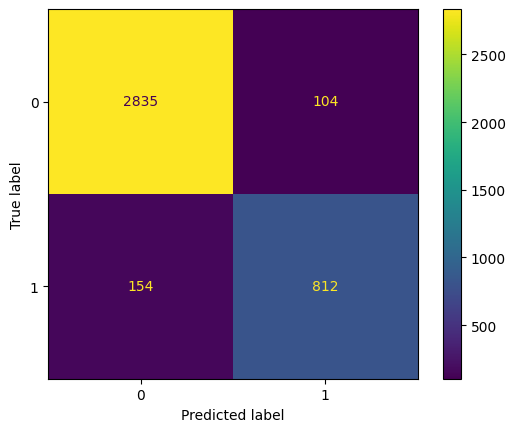

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report")
print(metrics.classification_report(y_test, y_pred_knn))
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_knn))

TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

sensibilidad = TP / (FN + TP)
especificidad = TN / (TN + FP)
precision = TP / (FP + TP)
tasa_falsa_alarma = FP / (TN + FP)

print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Precisión:", precision)
print("Tasa de falsa alarma:", tasa_falsa_alarma)

#### Árbol de Decisión

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2939
           1       0.78      0.79      0.79       966

    accuracy                           0.89      3905
   macro avg       0.86      0.86      0.86      3905
weighted avg       0.89      0.89      0.89      3905

Confusion Matrix
Accuracy Score: 0.89449423815621
Sensibilidad: 0.7898550724637681
Especificidad: 0.9288873766587274
Precisión: 0.7849794238683128
Tasa de falsa alarma: 0.07111262334127254


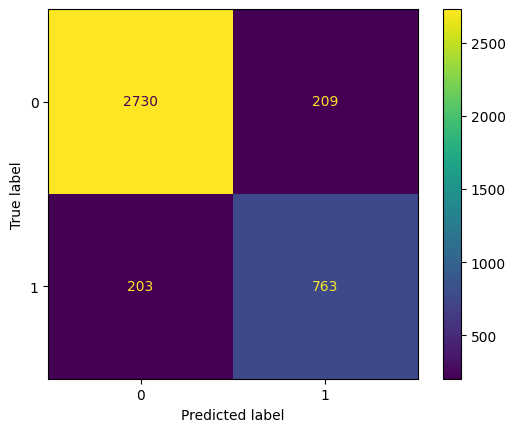

In [4]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Classification Report")
print(metrics.classification_report(y_test, y_pred_dtree))
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=dtree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot();
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_dtree))

TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

sensibilidad = TP / (FN + TP)
especificidad = TN / (TN + FP)
precision = TP / (FP + TP)
tasa_falsa_alarma = FP / (TN + FP)

print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Precisión:", precision)
print("Tasa de falsa alarma:", tasa_falsa_alarma)


#### Máquina de Vectores de Soporte (SVM)

SVM Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2939
           1       0.85      0.78      0.81       966

    accuracy                           0.91      3905
   macro avg       0.89      0.87      0.88      3905
weighted avg       0.91      0.91      0.91      3905

Confusion Matrix
Accuracy Score: 0.9111395646606915
Sensibilidad: 0.7753623188405797
Especificidad: 0.9557672677781558
Precisión: 0.8521046643913538
Tasa de falsa alarma: 0.044232732221844165


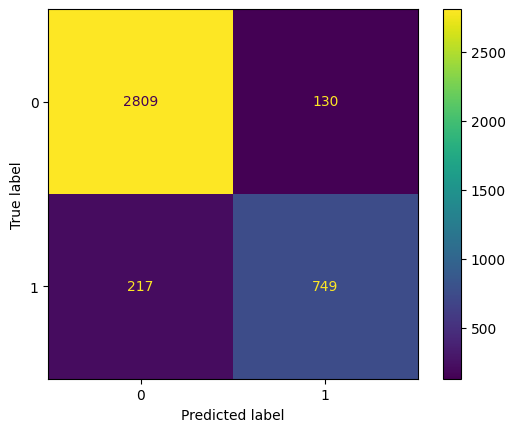

In [5]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report")
print(metrics.classification_report(y_test, y_pred_svm))
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot();
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_svm))

TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

sensibilidad = TP / (FN + TP)
especificidad = TN / (TN + FP)
precision = TP / (FP + TP)
tasa_falsa_alarma = FP / (TN + FP)

print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Precisión:", precision)
print("Tasa de falsa alarma:", tasa_falsa_alarma)
